In [1]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
tf.__version__

'1.14.0'

In [2]:
dataset = np.mat([
    [0, 0, 1],
    [0, 1, 1],
    [1, 0, 1],
    [1, 1, 0]
])

In [3]:
model = keras.Sequential([
    layers.Dense(1, activation=tf.sigmoid, input_shape=[2])
])
model.compile(loss=tf.losses.sigmoid_cross_entropy, optimizer=keras.optimizers.SGD(1))

class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 500 == 0: print(epoch, logs['loss'])
            
history = model.fit(
    dataset[:, [0, 1]],
    dataset[:, [2]],
    epochs=2500,
    verbose=0,
    callbacks=[PrintDot()]
)
history.history['loss'][-1]

W0903 13:18:20.074124 21152 deprecation.py:506] From C:\Users\Sveinung\Anaconda3\envs\mlTensorflow\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0903 13:18:20.156993 21152 deprecation.py:323] From C:\Users\Sveinung\Anaconda3\envs\mlTensorflow\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


0 0.6020627617835999
500 0.4432278275489807
1000 0.4265579879283905
1500 0.42045527696609497
2000 0.4173516035079956


0.4154897928237915

<IPython.core.display.Javascript object>


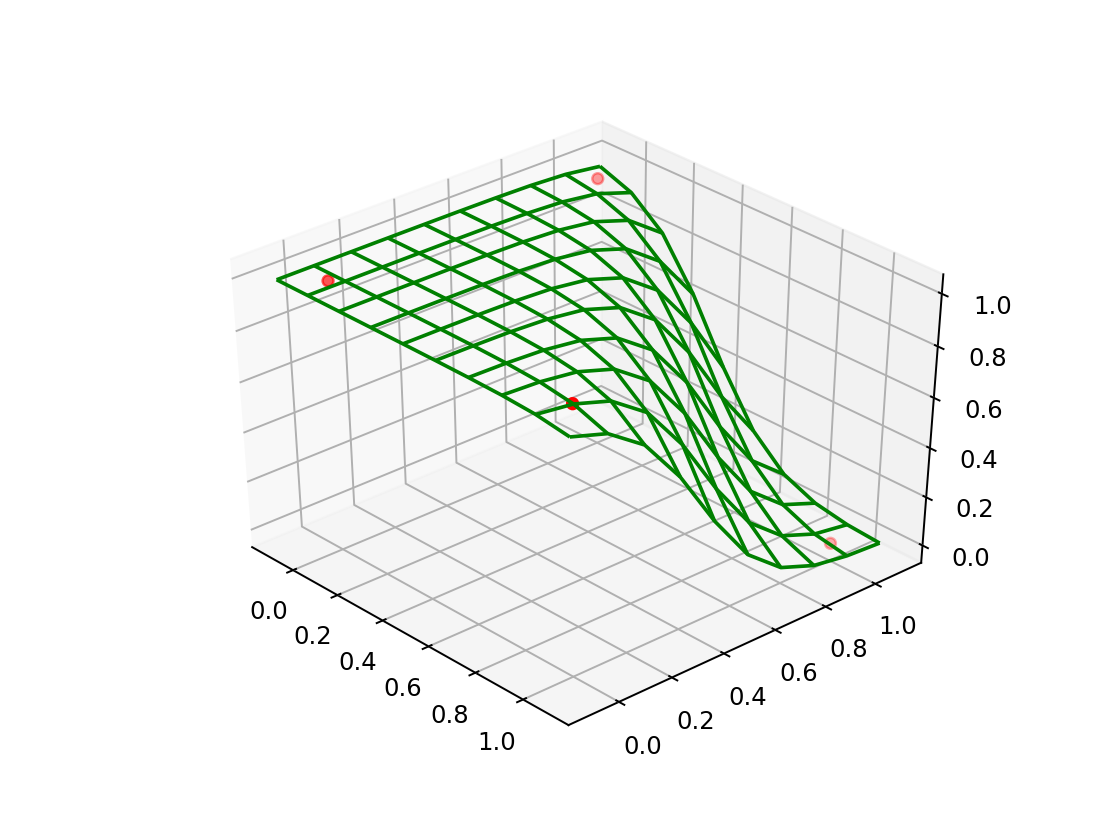

In [4]:
x1_grid, x2_grid = np.meshgrid(np.linspace(-.1, 1.1, 10), np.linspace(-.1, 1.1, 10))
y_grid = np.empty([10, 10])
for i in range(0, x1_grid.shape[0]):
    for j in range(0, x1_grid.shape[1]):
        point = np.mat([[x1_grid[i, j], x2_grid[i, j]]])
        value = model.predict(point)
        y_grid[i, j] = value
        
%matplotlib notebook
ax = plt.figure().add_subplot(111, projection='3d')
ax.plot_wireframe(x1_grid, x2_grid, y_grid, color='green')
ax.scatter(dataset[:, [0]], dataset[:, [1]], dataset[:, [2]], 'o', color='red')